In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings("ignore")


In [3]:

df = pd.read_csv("/Users/lahekjhagadiawala/AlphaInternship/AlphaInternship/Product Demand Forecast/sales_data.csv")
df.head()


,Date,ID,Item,Account,sales
0,2022-01-07 00:00:00.000,11831,Levis Mens Jeans,PRANJAL K BARTHAKUR,5019
1,2022-01-08 00:00:00.000,11328,CUP PLATE SET,LAKHI,550
2,2022-01-08 00:00:00.000,11796,Mens Vest,M. BHATTACHARJEE,560
3,2022-01-08 00:00:00.000,11796,Mens Vest,M. BHATTACHARJEE,560
4,2022-01-08 00:00:00.000,12083,MENS JUMPER F/S,LOBSANG,1110


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)
df.head()


,ID,Item,Account,sales
Date,,,,
2021-12-01,1200,BOYS HANDGLOVES,MONI BISWAS,500
2021-12-01,11543,MEKHELA CHADAR SET,NIBADITA DUTTA,3030
2021-12-01,1883,GIRLS SWEATSHIRT F/S,POJA DEVI,7740
2021-12-01,11636,Mens Woolen Cap,POJA DEVI,7740
2021-12-01,12411,Women Cardigan F/S,ARATI BORO,3240


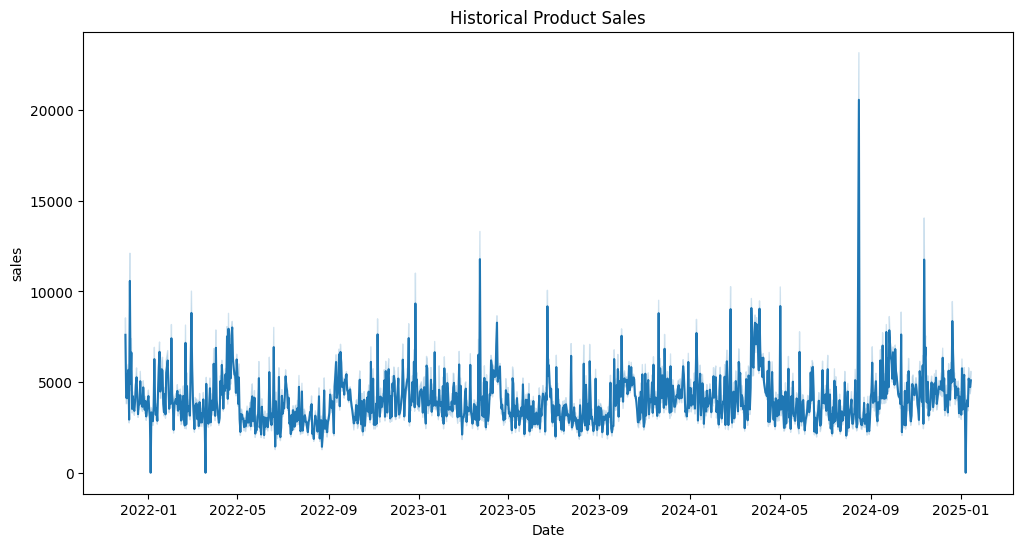

In [6]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='sales')
plt.title('Historical Product Sales')
plt.show()


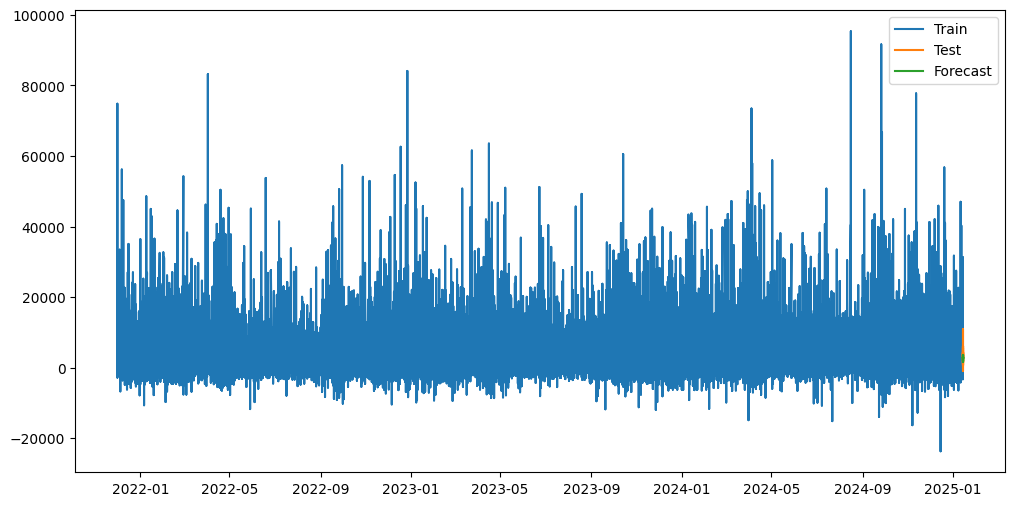

In [7]:

train = df.iloc[:-30]
test = df.iloc[-30:]

model = ExponentialSmoothing(train['sales'], trend='add', seasonal='add', seasonal_periods=12).fit()

forecast = model.forecast(30)

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['sales'], label='Train')
plt.plot(test.index, test['sales'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()


In [9]:
mae = mean_absolute_error(test['sales'], forecast)
print(f"MAE: {mae:.2f}")


MAE: 1805.35


In [10]:
rmse = np.sqrt(mean_squared_error(test['sales'], forecast))
print(f"RMSE: {rmse:.2f}")

RMSE: 2405.62


In [12]:
print(len(forecast))
print(len(test['sales']))


30
30


In [13]:
forecast = forecast[:len(test)]

In [15]:

forecast = model.forecast(steps=len(test))

forecast = pd.Series(forecast.values, index=test.index)

mape = np.mean(np.abs((test['sales'] - forecast) / test['sales'])) * 100
print(f"MAPE: {mape:.2f}%")


MAPE: 80.82%
